Maastikuökoloogia

__Evelyn Uuemaa, PhD__

- Praktikumi lisa

    Tudengid laevad üles oma CSV-faili ja saavad selle põhjal teha karpdiagrammid. Ühtlasi saavad nad tulemuse aruande jaoks pildifailina alla laadida.

## Kuidas seda skripti kasutada

Mine hiirega kõige esimesele kastile ja vajuta "Run" nuppu, et üksus läbi jooksutada ja minna järgmiste plokkide juurde. Kui midagi valesti läheb, saad sa lihtsasti uuesti algusest alustada.

In [1]:
from IPython.display import display
import ipywidgets as widgets

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

%matplotlib inline

Ülejärgmise ploki juures tuleb sul arvutist valida äsja salvestatud CSV-fail. Kui sinu CSV-faili eraldusmärgiks on koma, pole vaja midagi muuta. Kui aga semikoolon, tee muutus järgmises plokis: csv_delimiter = ";".

In [2]:
upload = widgets.FileUpload( accept='.csv', multiple=False )

csv_delimiter = ","
text_encoding = "utf8"

In [3]:
upload

FileUpload(value={}, accept='.csv', description='Upload')

Kui oled faili oma arvutist valinud, peaks üleslaadimise lahter näitama "Upload (1)", mis tähendab, et fail on nüüd valitud.

Jooksuta läbi järgmine plokk. Tulemuseks peaks olema ilus tabel, mitte ühes jorus tekst. Kui näed väärtuste vahel semikooloneid (;), tuleb teises plokis teha parandus (csv_delimiter = ";").

In [4]:
filestream_encoding = "latin1"

t = upload.data[0].decode(encoding=filestream_encoding)

with open('tmp.csv', 'w', encoding=text_encoding) as fh:
    fh.write(t)

df = pd.read_csv('tmp.csv', encoding=text_encoding, sep=csv_delimiter)

df.head(10)

,nimi,liik,ED,PD,SDI,MSI,MPS
0,107941_clip.tif,rukkirääk,39.233298,3.204666,1.241471,1.363491,31.204501
1,107945_clip.tif,rukkirääk,34.874042,2.243266,1.356577,1.555764,44.577858
2,64431_clip.tif,rukkirääk,21.873024,1.607975,0.943917,1.517701,62.190023
3,46597_clip.tif,rukkirääk,37.015887,2.251165,1.618734,1.641126,44.421445
4,79202_clip.tif,rukkirääk,31.524262,1.902770,0.908090,1.619907,52.554949
5,55746_clip.tif,rukkirääk,36.215352,3.845599,1.233802,1.347631,26.003751
6,107943_clip.tif,rukkirääk,27.258309,2.824731,0.826117,1.361905,35.401597
7,63408_clip.tif,rukkirääk,38.824617,2.854156,1.386288,1.561111,35.036633
8,126669_clip.tif,rukkirääk,45.445060,3.832153,1.575866,1.508586,26.094992
9,107973_clip.tif,rukkirääk,38.761963,3.832153,1.463337,1.362103,26.094992


Nüüd on andmed loetud andmeraami (*dataframe*) formaati ja me saame arvutada statistikuid ning teha jooniseid. Muuda järgmises plokis muutuja "classes" väärtust, kui sul on see tulp mõne teise nimega kui "liik" (nt "Liik"). Seejärel jooksuta järgmist plokki, et saada karpvurrdiagramm.

Iga järgmise näitajaga joonise tegemiseks muuda siin ka "values" väärtust (nt values = "SEI", values = "AWMSI" jne).

In [6]:
classes = "liik"

values = "SDI"

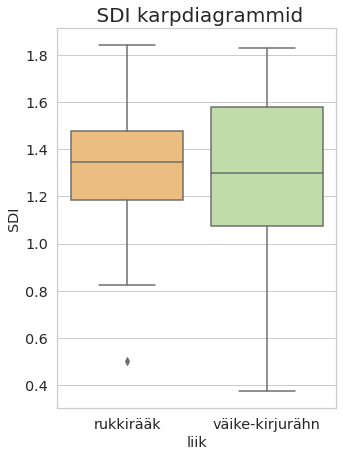

In [7]:
df['values_prep'] = pd.to_numeric(df[values], errors='coerce')

df = df.rename(columns={values : f"{values}_"})
df = df.rename(columns={'values_prep' : values})

fig, ax = plt.subplots(figsize=(5,7))

sns.boxplot(x=classes, y=values, data=df.dropna(subset=[classes, values]), palette="Spectral")
plt.xticks(
    rotation=0, 
    horizontalalignment='center',
    fontweight='light',
    fontsize='x-large', 
)
plt.xlabel(classes, fontsize='x-large')
plt.yticks(
    rotation=0, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large',
)
plt.ylabel(values, fontsize='x-large')

plt.title(f" {values} karpdiagrammid", fontsize=20)

plt.savefig('boxplots.png', bbox_inches='tight', transparent=False)
plt.show()

[lae joonis alla siit](boxplots.png)

Alternatiivina võid ka pildi lihtsalt otse kopeerida, vajutades hiire parema klõpsuga pildil.

**Karpdiagrammide tõlgendamine**
 “karbi” keskjoon näitab mediaani, karbi ülemine ja alumine serv märgib 75% ja 25% protsentiile (1. ja 3. kvartiili), püstjoonte äärmusotsad (vuntsid) markeerivad väljaspoole kvartiilihaaret x 1,5 jäävaid vaatlusi, mida nimetatakse erinditeks (outlier). (Kvartiilihaare on inglise keeles Interquartile range, IQR)
 SDI ehk Shannoni mitmekesisuse indeksite võrdluse põhjal võime öelda, et rukkiräägu elupaikadele arvutatud SDI mediaanväärtus on veidi kõrgem kirjurähni elupaikade SDI mediaanväärtusest. Seega võib öelda, et rukkirääk eelistab natuke keerukama maastikuga elupaiku. Samas peaksime seda erinevust veel statistilisel testima, milleks kasutame allpool Mann-Whitney U testi, mis võimaldab hinnata, kas see elupaikade erinevus on ka statistiliselt oluline.
 Lisaks võime veel karpdiagrammidelt välja lugeda, et kirjurähni elupaikadele arvutatud SDI väärtused on suurema varieeruvusega (karp ja vuntsid on suurema ulatusega) kui rukkiräägul. Seega võiksime oletada, et rukkiräägu elupaiga eelistused on SDI indeksi alusel hinnatava maastiku keerukuse osas veidi kitsamad st kirjurähni elupaigad on suurema maastiku keerukuse varieeruvusega kui rukkiräägul.

## Mann-Whitney U test

Mann-Whitney U test on mitteparameetriline test, mida kasutatakse kahe rühma võrdlemiseks juhul kui rühmad ei ole normaaljaotusega ja/või vaatlusandmeid on vähe. Valimi suurus peaks olema vähemalt 20 ning võrreldavad muutujad  peaksid olema üksteisest sõltumatud. 

In [8]:
from scipy.stats import mannwhitneyu

if not len(df[classes].unique()) == 2:
    print("Hoiatus! Vajalik on kaks klassi")

group1 = df.loc[df[classes] == df[classes].unique()[0]][values]
group2 = df.loc[df[classes] == df[classes].unique()[1]][values]

#perform the Mann-Whitney U test
result = mannwhitneyu(group1, group2, alternative='two-sided')
print(f"U statistik {result.statistic}")
print(f"P-väärtus {result.pvalue}")

U statistik 1255.0
P-väärtus 0.9752518435738073


**Tulemuste tõlgendamine**

Nullhüpotees: kahe liigi elupaikade maastik on sarnane uuritava maastikuindeksi põhjal hinnatuna 

Sisukas hüpotees: kahe liigi elupaikade maastik on erinev uuritava maastikuindeksi põhjal hinnatuna 

Kui p-väärtus ei ole väiksem kui 0,05, siis me ei saa nullhüpoteesi ümber lükata. Seega kahe rühma erinevus on statistiliselt oluline, kui p < 0,05.
